In [3]:
import numpy as np
import matplotlib.pyplot as plt

Parametry zadania

In [4]:
N_USERS = 100          # liczba użytkowników
N_MAX = 20_000         # liczba losowań (polecam powyżej 1e4)
p_login = 0.2          # dla niezalogowanych
p_logout = 0.5         # dla zalogowanych

Funkcja wykonująca jedną symulację

In [5]:
def simulate_100_users(N_users, N_max, p_login, p_logout, start_logged=0):
    # wektor mówiący, czy dany user jest zalogowany (1) czy nie (0)
    state = np.zeros(N_users, dtype=int)

    # ustaw stan początkowy
    if start_logged > 0:
        state[:start_logged] = 1

    # histogram (zlicza ile razy pojawił się stan z X zalogowanymi)
    counts = np.zeros(N_users + 1)

    # symulacja
    for step in range(N_max):
        logged = np.sum(state)

        # zliczamy odwiedziny
        counts[logged] += 1

        # losujemy zachowanie użytkowników
        # niezalogowani mogą się logować
        login_events = (state == 0) & (np.random.rand(N_users) < p_login)

        # zalogowani mogą się wylogować
        logout_events = (state == 1) & (np.random.rand(N_users) < p_logout)

        # aktualizujemy stan
        state[login_events] = 1
        state[logout_events] = 0

    # zwracamy rozkład prawdopodobieństwa
    Pi_exp = counts / N_max
    return Pi_exp

Symulacja

In [6]:
Pi_exp = simulate_100_users(
    N_USERS, N_MAX, p_login, p_logout, start_logged=0
)

Wykres rozkładu stacjonarnego Pi^EXP

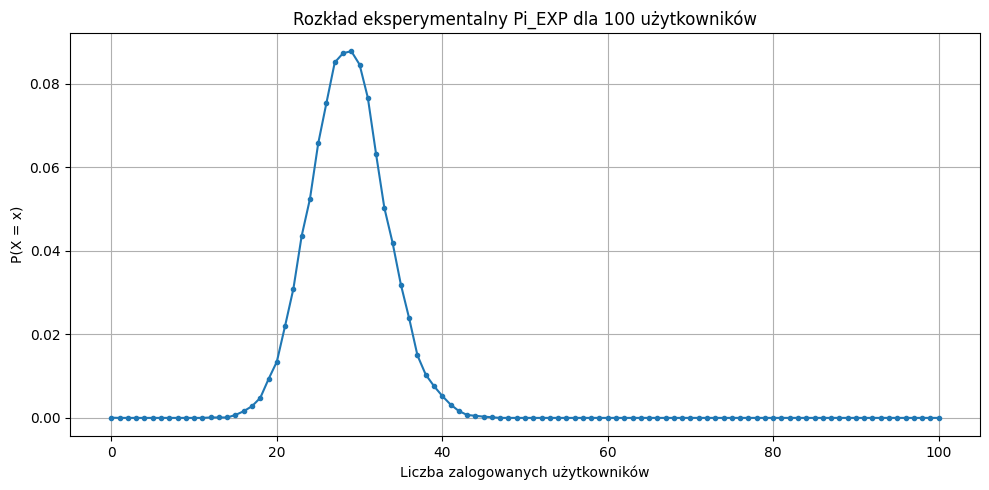

In [7]:
plt.figure(figsize=(10,5))
plt.plot(Pi_exp, marker='o', markersize=3)
plt.title("Rozkład eksperymentalny Pi_EXP dla 100 użytkowników")
plt.xlabel("Liczba zalogowanych użytkowników")
plt.ylabel("P(X = x)")
plt.grid(True)
plt.tight_layout()
plt.show()

Wydruk wyników

In [8]:
print("\nNajczęściej występujące stany:")
top_indices = np.argsort(Pi_exp)[::-1][:10]
for i in top_indices:
    print(f"X={i}: {Pi_exp[i]:.6f}")



Najczęściej występujące stany:
X=29: 0.087800
X=28: 0.087300
X=27: 0.085100
X=30: 0.084600
X=31: 0.076650
X=26: 0.075450
X=25: 0.065700
X=32: 0.063100
X=24: 0.052400
X=33: 0.050250
